In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [2]:
airline_data = pd.read_csv('./Detailed_Statistics_Arrivals.csv')

weather_syr=pd.read_csv('./Syracuse_weather.csv')

In [4]:
airline_data
weather_syr.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,UA,01/01/2022,1282,N4901U,IAD,23:10,00:01,70,76,51,23:55,6,23,0,6,0,22
1,UA,01/02/2022,1282,N4901U,IAD,23:10,23:27,70,64,17,23:19,8,17,0,0,0,0
2,UA,01/03/2022,1282,N893UA,IAD,23:10,23:31,70,68,21,23:25,6,21,0,0,0,0
3,UA,01/04/2022,1282,N814UA,IAD,23:44,01:59,69,89,135,01:55,4,115,0,20,0,0
4,UA,01/05/2020,2012,N825UA,ORD,21:47,21:55,107,94,8,21:50,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,UA,12/31/2019,1460,N838UA,EWR,18:15,18:14,75,60,-1,18:08,6,0,0,0,0,0
1882,UA,12/31/2021,467,N872UA,IAD,18:38,18:32,78,68,-6,18:27,5,0,0,0,0,0
1883,UA,12/31/2022,604,N801UA,DEN,14:58,14:46,193,178,-12,14:39,7,0,0,0,0,0
1884,UA,12/31/2022,1998,N23707,ORD,21:08,20:44,113,98,-24,20:40,4,0,0,0,0,0


,app_temp,azimuth,clouds,datetime,dewpt,dhi,dni,elev_angle,ghi,h_angle,...,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather,wind_dir,wind_gust_spd,wind_spd
0,7.80,354.92,100,2019-01-01:05,4.70,0.00,0.00,-69.87,0.00,NaN,...,7.80,2019-01-01T00:00:00,2019-01-01T05:00:00,1546318800,0.00,16.00,"{'icon': 'r01n', 'description': 'Light rain', ...",170,10.00,5.10
1,8.90,32.54,100,2019-01-01:06,5.50,0.00,0.00,-67.19,0.00,NaN,...,8.90,2019-01-01T01:00:00,2019-01-01T06:00:00,1546322400,0.00,16.00,"{'icon': 'c04n', 'description': 'Overcast clou...",200,9.00,5.10
2,9.40,58.16,100,2019-01-01:07,6.70,0.00,0.00,-59.33,0.00,NaN,...,9.40,2019-01-01T02:00:00,2019-01-01T07:00:00,1546326000,0.00,16.00,"{'icon': 'c04n', 'description': 'Overcast clou...",180,11.00,4.60
3,11.10,74.56,100,2019-01-01:08,7.80,0.00,0.00,-49.29,0.00,NaN,...,11.10,2019-01-01T03:00:00,2019-01-01T08:00:00,1546329600,0.00,16.00,"{'icon': 'c04n', 'description': 'Overcast clou...",200,13.00,8.20
4,10.60,86.56,100,2019-01-01:09,8.20,0.00,0.00,-38.51,0.00,NaN,...,10.60,2019-01-01T04:00:00,2019-01-01T09:00:00,1546333200,0.00,16.00,"{'icon': 'c04n', 'description': 'Overcast clou...",230,17.00,7.20


In [1]:
airline_data['Origin Airport'].value_count()

NameError: name 'airline_data' is not defined

In [1024]:
airline_data.isna().sum()

Carrier Code                                 0
Date (MM/DD/YYYY)                            0
Flight Number                                0
Tail Number                                 56
Origin Airport                               0
Scheduled Arrival Time                       0
Actual Arrival Time                          0
Scheduled Elapsed Time (Minutes)             0
Actual Elapsed Time (Minutes)                0
Arrival Delay (Minutes)                      0
Wheels-on Time                               0
Taxi-In time (Minutes)                       0
Delay Carrier (Minutes)                      0
Delay Weather (Minutes)                      0
Delay National Aviation System (Minutes)     0
Delay Security (Minutes)                     0
Delay Late Aircraft Arrival (Minutes)        0
dtype: int64

In [1025]:
airline_data.dropna(inplace=True)

In [1026]:
airline_data['Flight Number']=airline_data['Flight Number'].astype(np.int64)
airline_data['Scheduled Elapsed Time (Minutes)']=airline_data['Scheduled Elapsed Time (Minutes)'].astype(np.int64)
airline_data['Actual Elapsed Time (Minutes)']=airline_data['Actual Elapsed Time (Minutes)'].astype(np.int64)
airline_data['Arrival Delay (Minutes)']=airline_data['Arrival Delay (Minutes)'].astype(np.int64)
airline_data['Delay Carrier (Minutes)']=airline_data['Delay Carrier (Minutes)'].astype(np.int64)
airline_data['Delay Weather (Minutes)']=airline_data['Delay Weather (Minutes)'].astype(np.int64)
airline_data['Delay National Aviation System (Minutes)']=airline_data['Delay National Aviation System (Minutes)'].astype(np.int64)
airline_data['Delay Security (Minutes)']=airline_data['Delay Security (Minutes)'].astype(np.int64)
airline_data['Delay Late Aircraft Arrival (Minutes)']=airline_data['Delay Late Aircraft Arrival (Minutes)'].astype(np.int64)

In [1027]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830 entries, 0 to 1885
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Carrier Code                              1830 non-null   object
 1   Date (MM/DD/YYYY)                         1830 non-null   object
 2   Flight Number                             1830 non-null   int64 
 3   Tail Number                               1830 non-null   object
 4   Origin Airport                            1830 non-null   object
 5   Scheduled Arrival Time                    1830 non-null   object
 6   Actual Arrival Time                       1830 non-null   object
 7   Scheduled Elapsed Time (Minutes)          1830 non-null   int64 
 8   Actual Elapsed Time (Minutes)             1830 non-null   int64 
 9   Arrival Delay (Minutes)                   1830 non-null   int64 
 10  Wheels-on Time                            1830 n

In [1028]:
airline_data.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,UA,01/01/2022,1282,N4901U,IAD,23:10,00:01,70,76,51,23:55,6,23,0,6,0,22
1,UA,01/02/2022,1282,N4901U,IAD,23:10,23:27,70,64,17,23:19,8,17,0,0,0,0
2,UA,01/03/2022,1282,N893UA,IAD,23:10,23:31,70,68,21,23:25,6,21,0,0,0,0
3,UA,01/04/2022,1282,N814UA,IAD,23:44,01:59,69,89,135,01:55,4,115,0,20,0,0
4,UA,01/05/2020,2012,N825UA,ORD,21:47,21:55,107,94,8,21:50,5,0,0,0,0,0


In [1]:
def set_dependent_variable(time):
    if time<-5:
        return 'Early'
    elif (time>=-5 and time<=5):
        return 'On-time'
    else:
        return 'Late'
    

In [1030]:
airline_data['Status']=airline_data['Arrival Delay (Minutes)'].apply(set_dependent_variable)

In [1031]:
airline_data.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Origin Airport', 'Scheduled Arrival Time', 'Actual Arrival Time',
       'Scheduled Elapsed Time (Minutes)', 'Actual Elapsed Time (Minutes)',
       'Arrival Delay (Minutes)', 'Wheels-on Time', 'Taxi-In time (Minutes)',
       'Delay Carrier (Minutes)', 'Delay Weather (Minutes)',
       'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)',
       'Delay Late Aircraft Arrival (Minutes)', 'Status'],
      dtype='object')

In [1032]:
airline_data.isna().sum()

Carrier Code                                0
Date (MM/DD/YYYY)                           0
Flight Number                               0
Tail Number                                 0
Origin Airport                              0
Scheduled Arrival Time                      0
Actual Arrival Time                         0
Scheduled Elapsed Time (Minutes)            0
Actual Elapsed Time (Minutes)               0
Arrival Delay (Minutes)                     0
Wheels-on Time                              0
Taxi-In time (Minutes)                      0
Delay Carrier (Minutes)                     0
Delay Weather (Minutes)                     0
Delay National Aviation System (Minutes)    0
Delay Security (Minutes)                    0
Delay Late Aircraft Arrival (Minutes)       0
Status                                      0
dtype: int64

In [1033]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [1034]:
airline_data.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Origin Airport', 'Scheduled Arrival Time', 'Actual Arrival Time',
       'Scheduled Elapsed Time (Minutes)', 'Actual Elapsed Time (Minutes)',
       'Arrival Delay (Minutes)', 'Wheels-on Time', 'Taxi-In time (Minutes)',
       'Delay Carrier (Minutes)', 'Delay Weather (Minutes)',
       'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)',
       'Delay Late Aircraft Arrival (Minutes)', 'Status'],
      dtype='object')

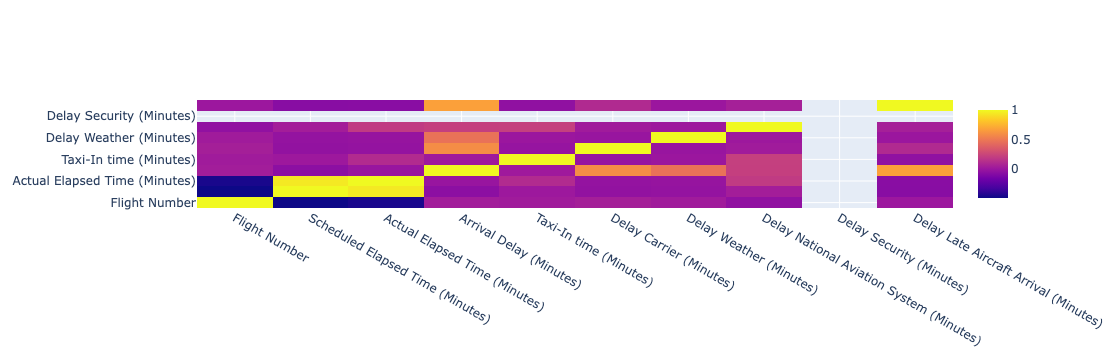

In [1035]:
correl = airline_data.corr()

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='Airline data heatmap')

In [1036]:
airline_data.drop(columns=['Carrier Code',  'Tail Number','Actual Arrival Time',
       'Scheduled Elapsed Time (Minutes)', 'Actual Elapsed Time (Minutes)',
       'Arrival Delay (Minutes)', 'Wheels-on Time', 'Taxi-In time (Minutes)',
       'Delay Carrier (Minutes)', 'Delay Weather (Minutes)',
       'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)',
       'Delay Late Aircraft Arrival (Minutes)'],inplace=True)

In [1037]:
airline_data.columns

Index(['Date (MM/DD/YYYY)', 'Flight Number', 'Origin Airport',
       'Scheduled Arrival Time', 'Status'],
      dtype='object')

In [1038]:
airline_data['Date']=airline_data['Date (MM/DD/YYYY)'].astype(np.datetime64)

In [1039]:
airline_data.drop(columns=['Date (MM/DD/YYYY)'],inplace=True)

In [1040]:
airline_data

,Flight Number,Origin Airport,Scheduled Arrival Time,Status,Date
0,1282,IAD,23:10,Severely Late,2022-01-01
1,1282,IAD,23:10,Late,2022-01-02
2,1282,IAD,23:10,Late,2022-01-03
3,1282,IAD,23:44,Severely Late,2022-01-04
4,2012,ORD,21:47,On-time,2020-01-05
...,...,...,...,...,...
1881,1460,EWR,18:15,On-time,2019-12-31
1882,467,IAD,18:38,On-time,2021-12-31
1883,604,DEN,14:58,Early,2022-12-31
1884,1998,ORD,21:08,Early,2022-12-31


In [1041]:
airline_data['Status'].replace("Early",0,inplace=True)

In [1042]:
airline_data['Status'].replace("Severely Late",1,inplace=True)

In [1043]:
airline_data['Status'].replace("Late",2,inplace=True)

In [1044]:
airline_data['Status'].replace("On-time",3,inplace=True)

In [1045]:
set(airline_data['Origin Airport'])

{'DEN', 'EWR', 'IAD', 'ORD'}

In [1046]:
from datetime import datetime


In [1047]:
airline_data['Scheduled Arrival Hour']= pd.to_datetime(airline_data['Scheduled Arrival Time']).dt.hour
airline_data['Scheduled Arrival Minutes']= pd.to_datetime(airline_data['Scheduled Arrival Time']).dt.minute

airline_data

,Flight Number,Origin Airport,Scheduled Arrival Time,Status,Date,Scheduled Arrival Hour,Scheduled Arrival Minutes
0,1282,IAD,23:10,1,2022-01-01,23,10
1,1282,IAD,23:10,2,2022-01-02,23,10
2,1282,IAD,23:10,2,2022-01-03,23,10
3,1282,IAD,23:44,1,2022-01-04,23,44
4,2012,ORD,21:47,3,2020-01-05,21,47
...,...,...,...,...,...,...,...
1881,1460,EWR,18:15,3,2019-12-31,18,15
1882,467,IAD,18:38,3,2021-12-31,18,38
1883,604,DEN,14:58,0,2022-12-31,14,58
1884,1998,ORD,21:08,0,2022-12-31,21,8


In [1048]:
airline_data.drop(columns=['Scheduled Arrival Time'],inplace=True)

In [1049]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830 entries, 0 to 1885
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Flight Number              1830 non-null   int64         
 1   Origin Airport             1830 non-null   object        
 2   Status                     1830 non-null   int64         
 3   Date                       1830 non-null   datetime64[ns]
 4   Scheduled Arrival Hour     1830 non-null   int64         
 5   Scheduled Arrival Minutes  1830 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 100.1+ KB


In [1050]:
airline_data = pd.get_dummies(airline_data, drop_first = True)
airline_data.head()

,Flight Number,Status,Date,Scheduled Arrival Hour,Scheduled Arrival Minutes,Origin Airport_EWR,Origin Airport_IAD,Origin Airport_ORD
0,1282,1,2022-01-01,23,10,0,1,0
1,1282,2,2022-01-02,23,10,0,1,0
2,1282,2,2022-01-03,23,10,0,1,0
3,1282,1,2022-01-04,23,44,0,1,0
4,2012,3,2020-01-05,21,47,0,0,1


In [1051]:
airline_data.drop(columns=['Date'],inplace=True)

In [1052]:
airline_data

,Flight Number,Status,Scheduled Arrival Hour,Scheduled Arrival Minutes,Origin Airport_EWR,Origin Airport_IAD,Origin Airport_ORD
0,1282,1,23,10,0,1,0
1,1282,2,23,10,0,1,0
2,1282,2,23,10,0,1,0
3,1282,1,23,44,0,1,0
4,2012,3,21,47,0,0,1
...,...,...,...,...,...,...,...
1881,1460,3,18,15,1,0,0
1882,467,3,18,38,0,1,0
1883,604,0,14,58,0,0,0
1884,1998,0,21,8,0,0,1


In [1053]:
rf = RandomForestClassifier(random_state=50, min_samples_leaf = 6, max_features = "sqrt", n_estimators = 1000)

rf = rf.fit(airline_data.drop(columns=['Status']), airline_data['Status'])

In [1054]:
test_data=pd.read_csv('./project csv(Apr 12-15).csv')
test_data.drop(columns=['Status (Early, On-time, Late, Severly Late)','Day','Date'],inplace=True)
test_data

,Origin Airport,Flight Number,Arrival Time
0,ORD,UA 3839,10:00 AM
1,ORD,UA 3524,4:52 PM
2,ORD,UA 538,9:34 PM
3,ORD,UA 3839,10:00 AM
4,ORD,UA 3524,4:50 PM
5,ORD,UA 538,9:34 PM
6,ORD,UA 3839,10:00 AM
7,ORD,UA 3524,4:50 PM
8,ORD,UA 538,9:34 PM
9,ORD,UA 3839,10:00 AM


In [1055]:
test_data.dropna(inplace=True)

In [1056]:
test_data

,Origin Airport,Flight Number,Arrival Time
0,ORD,UA 3839,10:00 AM
1,ORD,UA 3524,4:52 PM
2,ORD,UA 538,9:34 PM
3,ORD,UA 3839,10:00 AM
4,ORD,UA 3524,4:50 PM
5,ORD,UA 538,9:34 PM
6,ORD,UA 3839,10:00 AM
7,ORD,UA 3524,4:50 PM
8,ORD,UA 538,9:34 PM
9,ORD,UA 3839,10:00 AM


In [1057]:
set(test_data['Origin Airport'])

{'DEN', 'EWR', 'IAD', 'ORD'}

In [1058]:
airline_data.columns

Index(['Flight Number', 'Status', 'Scheduled Arrival Hour',
       'Scheduled Arrival Minutes', 'Origin Airport_EWR', 'Origin Airport_IAD',
       'Origin Airport_ORD'],
      dtype='object')

In [1059]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Origin Airport  32 non-null     object
 1   Flight Number   32 non-null     object
 2   Arrival Time    32 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


In [1060]:
test_data['Flight Number']=(test_data['Flight Number'].str[3:]).astype(np.int64)
test_data

,Origin Airport,Flight Number,Arrival Time
0,ORD,3839,10:00 AM
1,ORD,3524,4:52 PM
2,ORD,538,9:34 PM
3,ORD,3839,10:00 AM
4,ORD,3524,4:50 PM
5,ORD,538,9:34 PM
6,ORD,3839,10:00 AM
7,ORD,3524,4:50 PM
8,ORD,538,9:34 PM
9,ORD,3839,10:00 AM


In [1061]:
test_data['Arrival Time']=(pd.to_datetime(test_data['Arrival Time'].str.strip(), format='%I:%M %p').dt.strftime('%H:%M'))

In [1062]:
test_data['Scheduled Arrival Hour']=pd.to_datetime(test_data['Arrival Time']).dt.hour
test_data['Scheduled Arrival Minutes']=pd.to_datetime(test_data['Arrival Time']).dt.minute

In [1063]:
test_data.drop(columns=['Arrival Time'],inplace=True)
test_data = pd.get_dummies(test_data, drop_first = True)
test_data

,Flight Number,Scheduled Arrival Hour,Scheduled Arrival Minutes,Origin Airport_EWR,Origin Airport_IAD,Origin Airport_ORD
0,3839,10,0,0,0,1
1,3524,16,52,0,0,1
2,538,21,34,0,0,1
3,3839,10,0,0,0,1
4,3524,16,50,0,0,1
5,538,21,34,0,0,1
6,3839,10,0,0,0,1
7,3524,16,50,0,0,1
8,538,21,34,0,0,1
9,3839,10,0,0,0,1


In [1064]:
rf.predict(test_data)

array([3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [1065]:
test_output = pd.DataFrame(rf.predict(test_data), index = test_data.index, columns = ['Status'])

test_output.head()
test_data = test_output.merge(test_data, left_index = True, right_index = True)
test_data

,Status
0,3
1,3
2,3
3,3
4,0


,Status,Flight Number,Scheduled Arrival Hour,Scheduled Arrival Minutes,Origin Airport_EWR,Origin Airport_IAD,Origin Airport_ORD
0,3,3839,10,0,0,0,1
1,3,3524,16,52,0,0,1
2,3,538,21,34,0,0,1
3,3,3839,10,0,0,0,1
4,0,3524,16,50,0,0,1
5,3,538,21,34,0,0,1
6,3,3839,10,0,0,0,1
7,0,3524,16,50,0,0,1
8,3,538,21,34,0,0,1
9,3,3839,10,0,0,0,1


In [1066]:
test_data['Status'].replace(0,"Early",inplace=True)
test_data['Status'].replace(1,"Severely Late",inplace=True)
test_data['Status'].replace(2,"Late",inplace=True)
test_data['Status'].replace(3,"On-time",inplace=True)
test_data

,Status,Flight Number,Scheduled Arrival Hour,Scheduled Arrival Minutes,Origin Airport_EWR,Origin Airport_IAD,Origin Airport_ORD
0,On-time,3839,10,0,0,0,1
1,On-time,3524,16,52,0,0,1
2,On-time,538,21,34,0,0,1
3,On-time,3839,10,0,0,0,1
4,Early,3524,16,50,0,0,1
5,On-time,538,21,34,0,0,1
6,On-time,3839,10,0,0,0,1
7,Early,3524,16,50,0,0,1
8,On-time,538,21,34,0,0,1
9,On-time,3839,10,0,0,0,1


In [1067]:
test_data.to_csv('./output.csv',index=None)